## **Notebook #7**
## Autoencoder training and manifold visualization for the MNIST database.
## Partially based on [this material](https://www.kaggle.com/apapiu/manifold-learning-and-autoencoders).
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):**  Caio Francisco Garcia de Lima **RA** 195210

### Loading the main libraries

In [ ]:
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras import layers
from keras.models import Model
from keras.layers import Input

### Reading the data

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [ ]:
x_train, x_test = x_train.astype("float32") / 255.0, x_test.astype("float32") / 255.0

x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

In [ ]:
x_images = x_train.reshape(len(x_train), 28, 28, 1)

In [ ]:
# Definition of a function to visualize some digits
def show(img):
    plt.imshow(img, cmap = "gray", interpolation = "none")

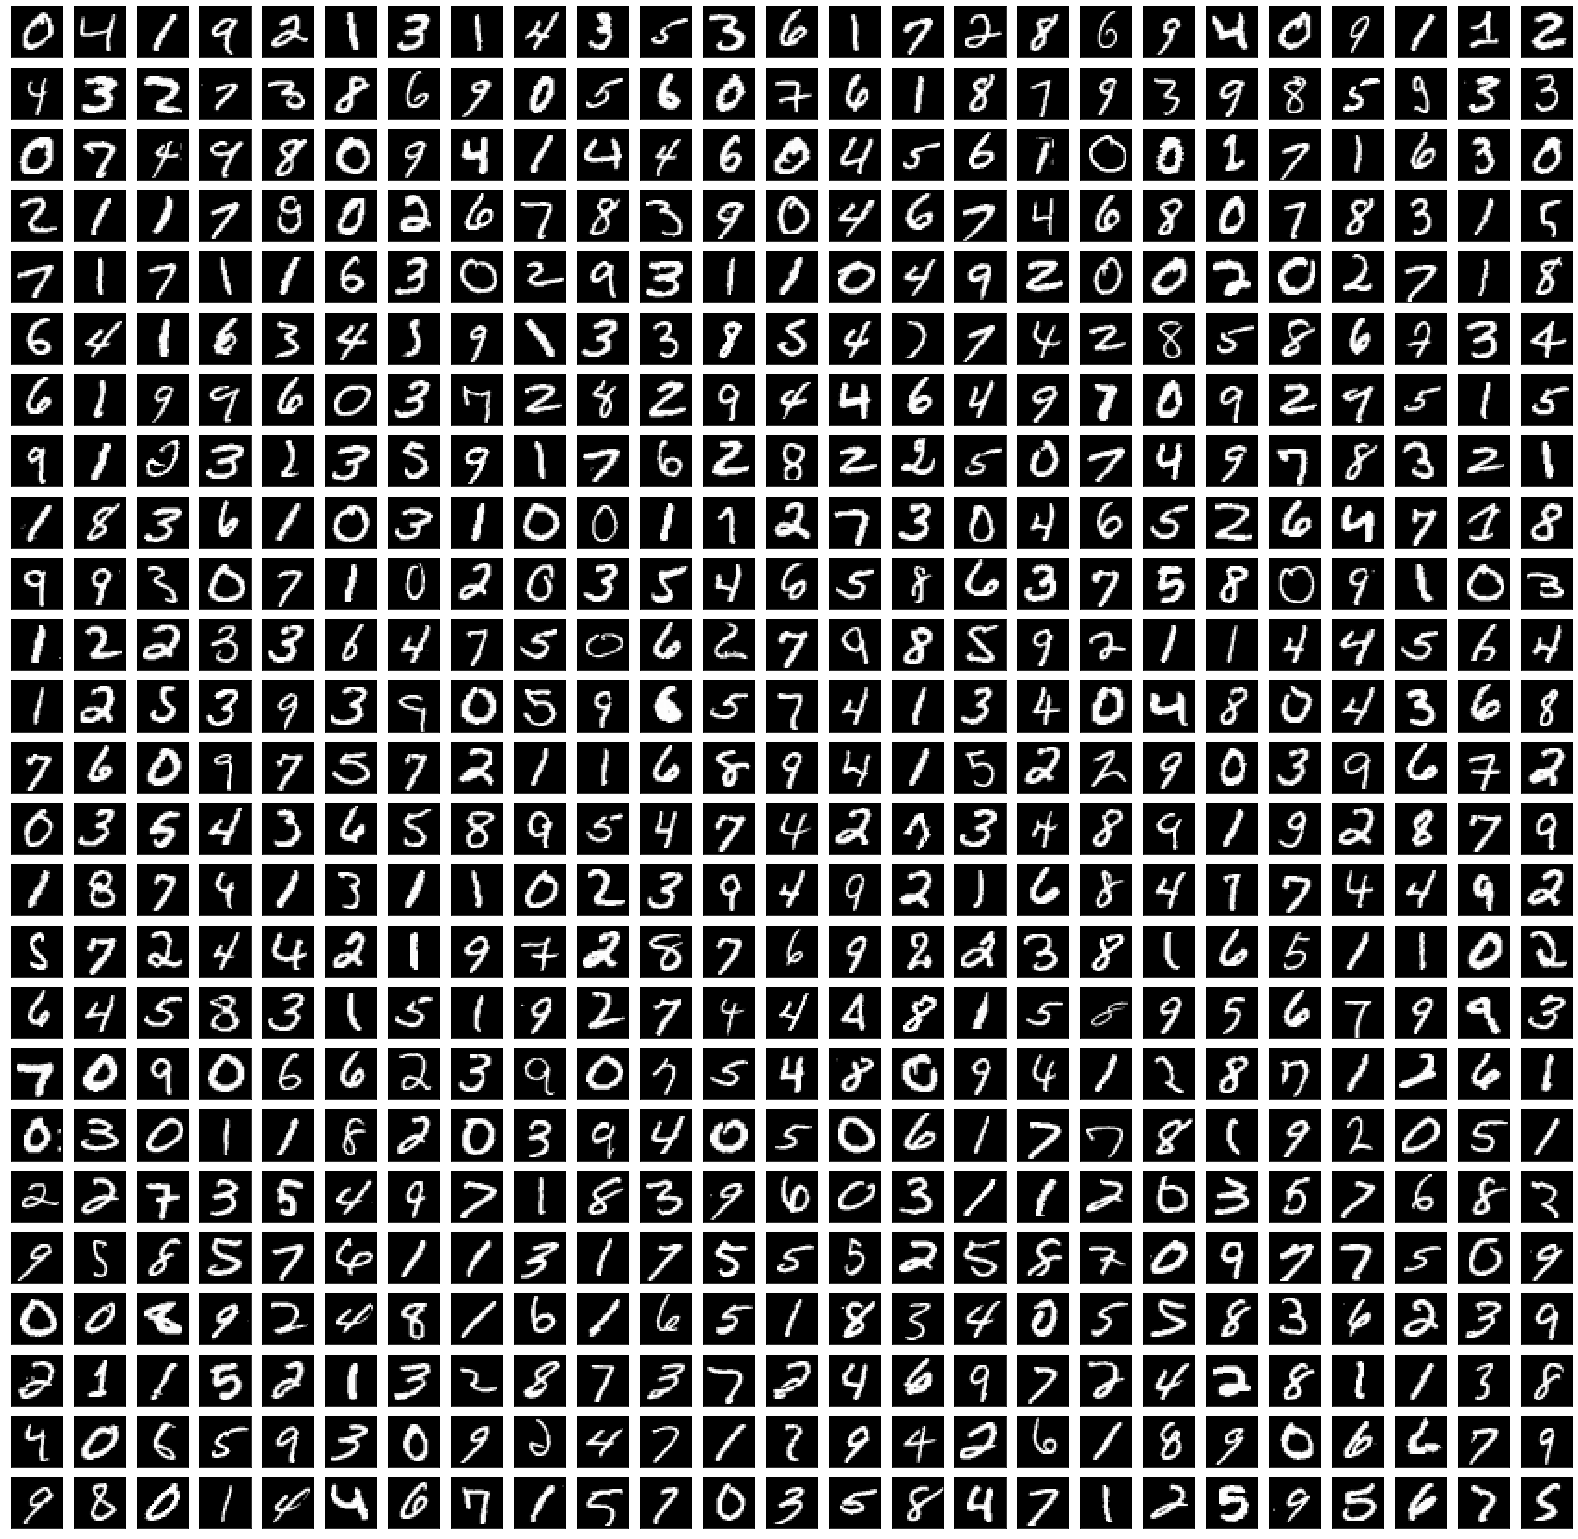

In [ ]:
# Visualization of 25 x 25 original images of digits
fig = plt.figure(figsize=(28,28))
ind = 1
for i in range(1, 26, 1):
    for j in range(1, 26, 1):
        fig.add_subplot(25,25,ind)
        show(x_images[ind])
        plt.xticks([])
        plt.yticks([])
        ind+=1

### Proposal for the autoencoder architecture

In [ ]:
input_img = layers.Input(shape=(28, 28, 1))

# Encoder
encoded = layers.Convolution2D(4, 3, strides=2, activation="relu", padding="same")(input_img)
encoded = layers.Convolution2D(4, 3, strides=2, activation="relu", padding="same")(encoded)

encoded = layers.Flatten()(encoded)
encoded = layers.Dense(90, activation='tanh')(encoded)
encoded = layers.Dense(32, activation='tanh')(encoded)

encoded = layers.Dense(2)(encoded)

#Decoder
decoded = layers.Dense(32, activation='tanh')(encoded)
decoded = layers.Dense(90, activation='tanh')(decoded)

decoded = layers.Dense(196, activation='tanh')(decoded)
decoded = layers.Reshape((7, 7, 4))(decoded)

decoded = layers.UpSampling2D((2, 2))(decoded)

decoded = layers.Convolution2D(4, 3, activation="relu", padding="same")(decoded)
decoded = layers.UpSampling2D((2, 2))(decoded)
decoded = layers.Convolution2D(4, 3, activation="relu", padding="same")(decoded)
decoded = layers.Convolution2D(1, (3, 3), activation="sigmoid", padding="same")(decoded)

# Autoencoder
autoencoder = Model(input_img, decoded)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 4)         40        
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 4)           148       
                                                                 
 flatten (Flatten)           (None, 196)               0         
                                                                 
 dense (Dense)               (None, 90)                17730     
                                                                 
 dense_1 (Dense)             (None, 32)                2912      
                                                                 
 dense_2 (Dense)             (None, 2)                 66    

In [ ]:
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
history = autoencoder.fit(
    x=x_train,
    y=x_train,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test),
)

Epoch 1/50
469/469 [==============================] - 15s 10ms/step - loss: 0.3113 - val_loss: 0.2394
Epoch 2/50
469/469 [==============================] - 5s 10ms/step - loss: 0.2219 - val_loss: 0.2089
Epoch 3/50
469/469 [==============================] - 5s 10ms/step - loss: 0.2029 - val_loss: 0.1978
Epoch 4/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1956 - val_loss: 0.1925
Epoch 5/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1913 - val_loss: 0.1892
Epoch 6/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1883 - val_loss: 0.1870
Epoch 7/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1862 - val_loss: 0.1851
Epoch 8/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1847 - val_loss: 0.1834
Epoch 9/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1834 - val_loss: 0.1826
Epoch 10/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1826 - val_loss: 0.

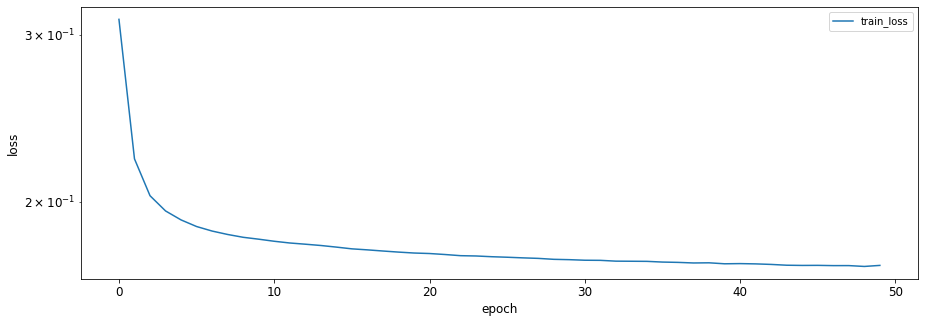

In [ ]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss']})
plot_df.plot(logy=True, figsize=(15,5), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

1/1 [==============================] - 0s 18ms/step


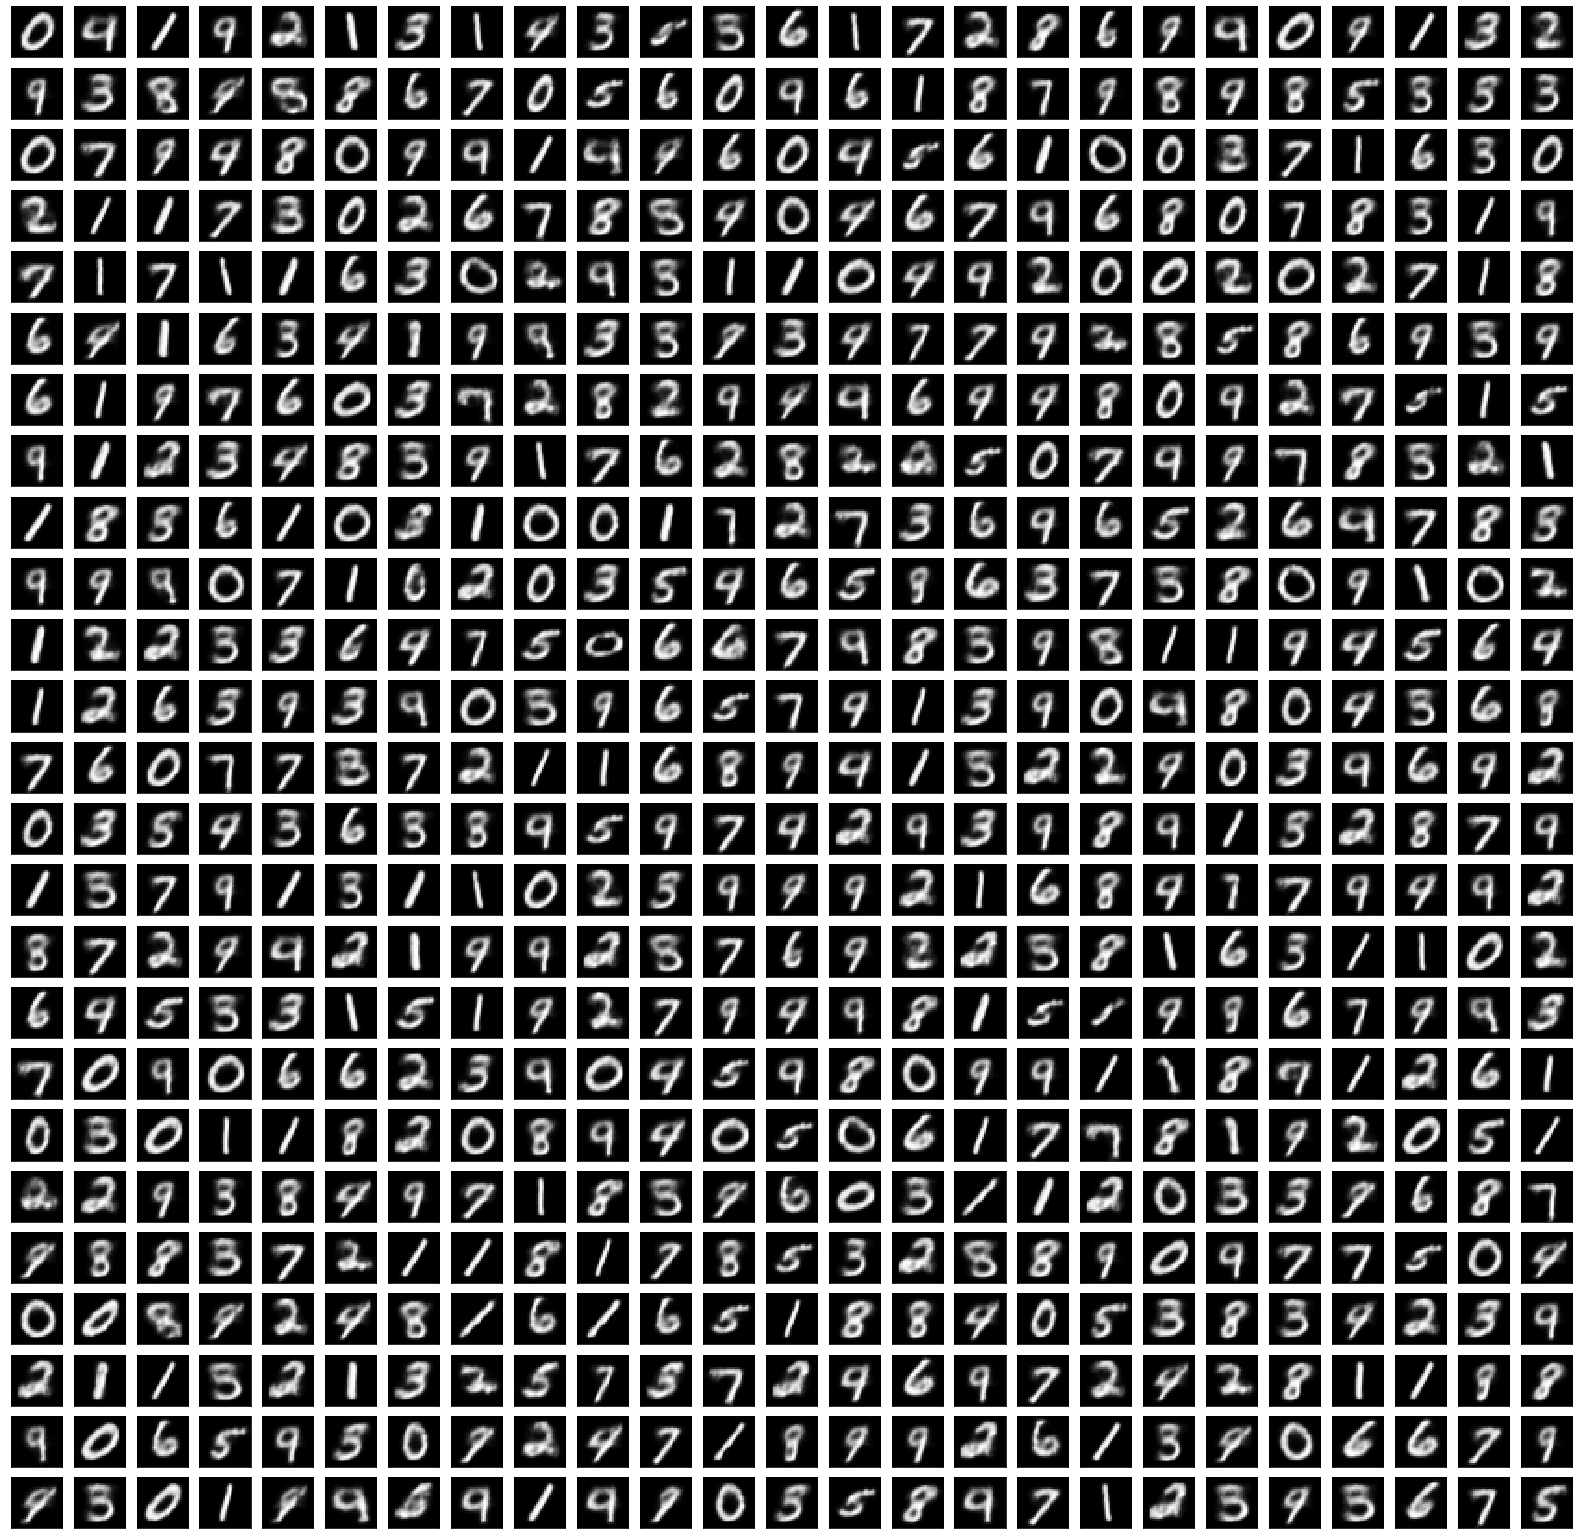

In [ ]:
# Visualization of 25 x 25 reconstructed images of digits
fig = plt.figure(figsize=(28,28))
ind = 1
for i in range(1, 26, 1):
    for j in range(1, 26, 1):
        fig.add_subplot(25,25,ind)
        show(autoencoder.predict(np.expand_dims(x_images[ind], 0)).reshape(28, 28))
        plt.xticks([])
        plt.yticks([])
        ind+=1

In [ ]:
autoencoder.layers

In [ ]:
encoder = Model(input_img, encoded)

# https://blog.keras.io/building-autoencoders-in-keras.html
# https://keras.io/examples/vision/autoencoder/

# Building the decoder
encoded_input = Input(shape=(2,))

encoded_layer_1 = autoencoder.layers[-9]
encoded_layer_2 = autoencoder.layers[-8]
encoded_layer_3 = autoencoder.layers[-7]
encoded_layer_4 = autoencoder.layers[-6]
encoded_layer_5 = autoencoder.layers[-5]
encoded_layer_6 = autoencoder.layers[-4]
encoded_layer_7 = autoencoder.layers[-3]
encoded_layer_8 = autoencoder.layers[-2]
encoded_layer_9 = autoencoder.layers[-1]


decoder = encoded_layer_1(encoded_input)
decoder = encoded_layer_2(decoder)
decoder = encoded_layer_3(decoder)
decoder = encoded_layer_4(decoder)
decoder = encoded_layer_5(decoder)
decoder = encoded_layer_6(decoder)
decoder = encoded_layer_7(decoder)
decoder = encoded_layer_8(decoder)
decoder = encoded_layer_9(decoder)
decoder = Model(encoded_input, decoder)

### Visualizing the images in the manifold

1875/1875 [==============================] - 3s 2ms/step


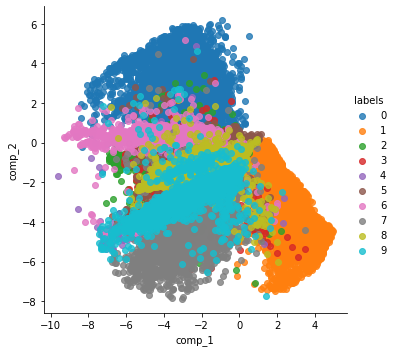

In [ ]:
import seaborn as sns

x_proj = encoder.predict(x_train[:60000])
x_proj.shape

proj = pd.DataFrame(x_proj)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y_train[:60000]
sns.lmplot("comp_1", "comp_2", hue="labels", data=proj, fit_reg=False)

### Generating new digits by moving along the manifold (latent 2D space)
**Please, adjust the scale whenever necessary.**

### Moving along a circle

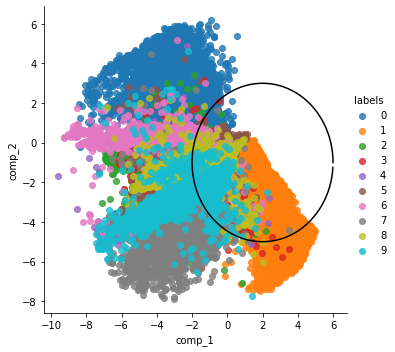

In [ ]:
_ = sns.lmplot("comp_1", "comp_2", hue="labels", data=proj, fit_reg=False)
all_x = [4 * np.cos(2 * np.pi / 100 * i) + 2 for i in range(100)]
all_y = [4 * np.sin(2 * np.pi / 100 * i) - 1 for i in range(100)]
_ = plt.plot(all_x, all_y, 'black')

1/1 [==============================] - 0s 17ms/step


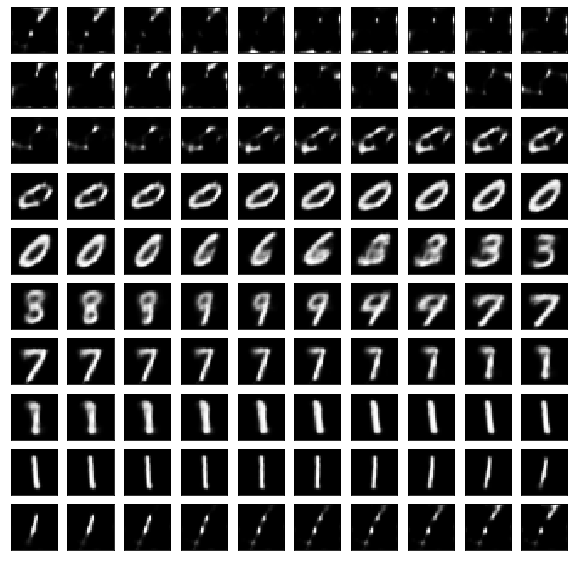

In [ ]:
# moving along a circle:
_ = plt.figure(figsize=(10, 10))

for i in range(100):
    _ = plt.subplot(10, 10, i+1)
    
    x = 4 * np.cos(2 * np.pi / 100 * i) + 2
    y = 4 * np.sin(2 * np.pi / 100 * i) - 1
    
    pt = np.array([[x, y]])
    _ = show(decoder.predict(pt).reshape((28, 28)))
    _ = plt.xticks([])
    _ = plt.yticks([])

### Moving along an ellipse

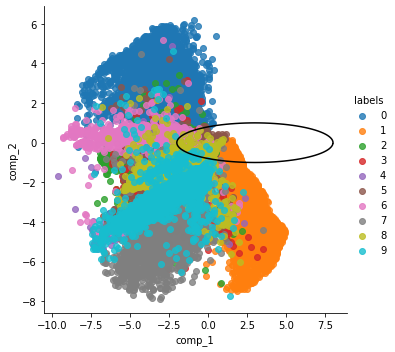

In [ ]:
_ = sns.lmplot("comp_1", "comp_2", hue="labels", data=proj, fit_reg=False)
all_x = [5 * np.cos(2 * np.pi / 100 * i) + 3 for i in range(100)]
all_y = [1 * np.sin(2 * np.pi / 100 * i) + 0 for i in range(100)]
_ = plt.plot(all_x, all_y, 'black')

1/1 [==============================] - 0s 17ms/step


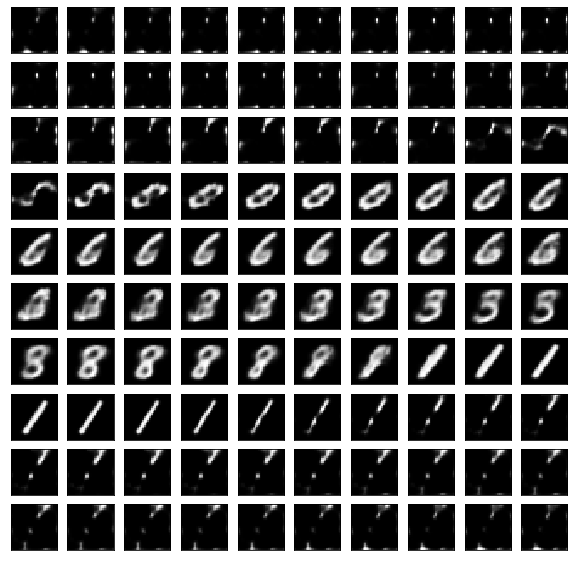

In [ ]:
# Moving along an elipse:
_ = plt.figure(figsize=(10, 10))

for i in range(100):
    _ = plt.subplot(10, 10, i+1)
    
    x = 5 * np.cos(2 * np.pi / 100 * i) + 3
    y = 1 * np.sin(2 * np.pi / 100 * i) + 0
    
    pt = np.array([[x, y]])
    _ = show(decoder.predict(pt).reshape((28, 28)))
    _ = plt.xticks([])
    _ = plt.yticks([])

### Moving along a grid

1/1 [==============================] - 0s 17ms/step


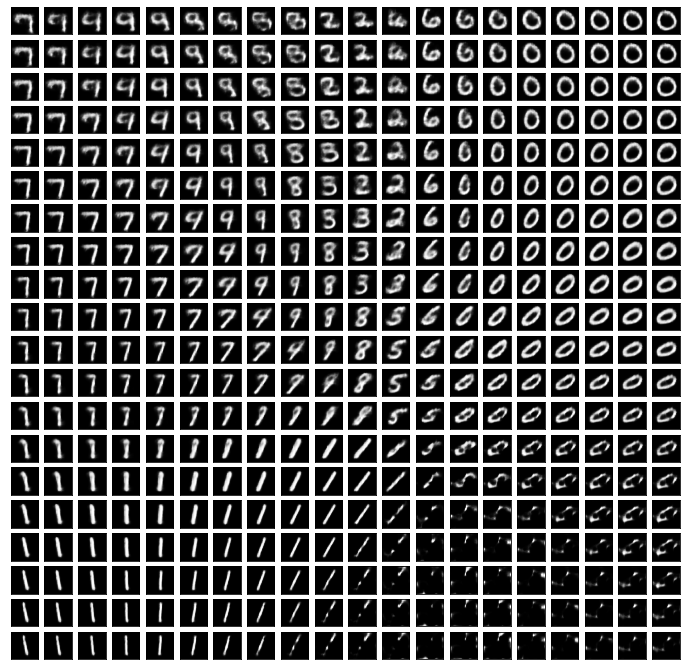

In [ ]:
# Moving along a grid:
_ = plt.figure(figsize=(12, 12))

for i in range(20):
    for j in range(20):
        
        _ = plt.subplot(20, 20, i * 20 + j + 1)
        
        pt = np.array([[ -6 + 10 * i / 19, -6 + 10 * j / 19]])
        _ = show(decoder.predict(pt).reshape((28, 28)))
        _ = plt.xticks([])
        _ = plt.yticks([])

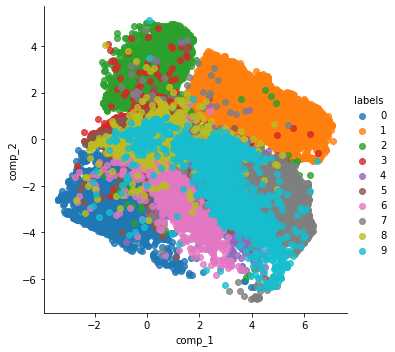
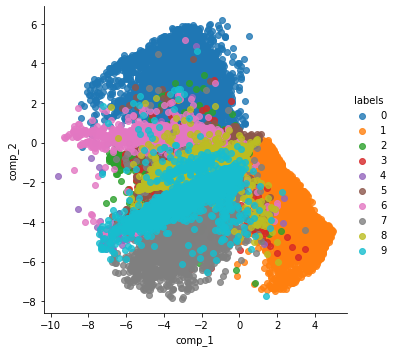

> Primeira imagem -> Arquitetura original<br>
> Segunda imagem -> Arquitetura modificada

Ao tentar melhorar a arquitetura com redes convolucionais é possível observar definições melhores da região das classes 0 e 7, porém em geral, não obtive grande sucesso em melhorar significantemente a representação do manifold